In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

In [13]:
def ab_sr (x, y):
    sum_xy = 0
    for i in range(len(x)):
        sum_xy += x[i]*y[i]
    return sum_xy/len(x)

def MNK_direct (x, y, pl = None, lab = None, color = None):
    sum_xy = ab_sr(x, y)
    sum_xx = ab_sr(x, x)
    sum_yy = ab_sr(y, y)
    k = sum_xy/sum_xx
    qk = (1/(len(x)**0.5))*(((sum_yy/sum_xx)-k**2)**0.5)
    if pl:
        pl.scatter(x, y, label = lab, marker='o', c = color)
        pl.plot ([x[0], x[len(x)-1]], [fx(x[0], k, 0), fx(x[len(x)-1], k, 0)], c = color)
    return [k, qk]
def fx(x, k, b):
    return x*k+b
def MNK (x, y, err_x = None, err_y = None, pl = None, lab = None, color = None):
    '''
    Функция для нахождения коэфициентов мнк и их погрешностей
    y = kx + b
    [k, b, полн_погр_k, отн_погр_b, среднкв_погр_k, отн_погр_k]
    '''
    k = (ab_sr(x, y)-sum(x)/len(x)*sum(y)/len(y))/(ab_sr(x, x) - (sum(x)/len(x))**2)
    b = sum(y)/len(y) - k*sum(x)/len(x)
    qk = (1/len(x)**0.5)*((ab_sr(y, y)-(sum(y)/len(y))**2)/((ab_sr(x, x)-(sum(x)/len(x))**2))-k**2)**0.5
    qb = qk * (ab_sr(x, x)-(sum(x)/len(x))**2)**0.5
    dk_s = 0
    if (ab_sr(x, x) - (sum(x)/len(x))**2) > 0 and (len(x)-2)>0:
        dk_s = math.sqrt(((ab_sr(y, y) - (sum(y)/len(y))**2)/(ab_sr(x, x) - (sum(x)/len(x))**2))/(len(x)-2)) 
    if pl:
        pl.errorbar(x, y, err_y, err_x, label = lab, marker='o', linestyle = '', c = color)
        pl.plot ([min(x), max(x)], [fx(min(x), k, b), fx(max(x), k, b)], c = color)
    return [k, b, math.sqrt(abs(dk_s)**2 + abs(qk)**2), abs(qb), abs(dk_s), abs(qk)]

# Работа 3.4.4 
# Петля гистерезиса (статический метод)

In [3]:
D_tor =  0.1 # средний диаметр тора в м
N = 1750 # количество витков намагничевающей обмотки
N_ = 300 # количество витков изметительной обмотки
N_c = 435 # количество витков(измерительных) соленоида
N_c_ = 825 # витки соленоида
d_c = 7 # диаметр соленоида (см)
d = 1# диаметр тора внутри (см)
l_c = 0.8 # длина соленоида (м).
err_dx = 0.5/1000 # абс. погрешность всех dx в м
dx_с = 0.10 # dx(в м) гальванометра при коллеровке
di_c = 1.4575 # di (в А) ток при коллебровке
m_0 = 4*math.pi*10**(-7)
R_c = 60 #полное сопротивление(ом) измерительной цепи с соленоидом
R = 100 #полное сопротивление(ом) измерительной цепи с тором

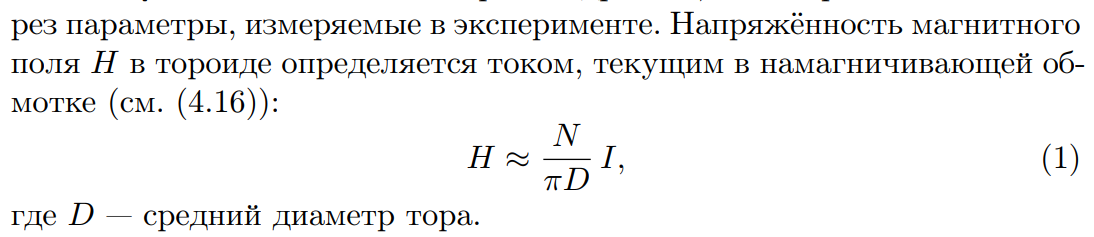

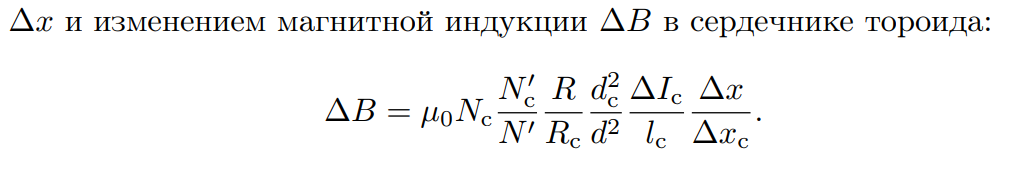

In [4]:
def ml_raz(a):
    return (len(str(a)[str(a).index('.')+1:]))
def err_i(i): # погрешность амперметра в А
    return abs(0.002*i+2*10**(-ml_raz(i*1000)))/1000
def H(I):
    return (N/(math.pi*D_tor))*I
def H_err(I):
    if abs(I) > 0:
        return abs(H(I)*(err_i(I)/I))
    else:
        return 0
def dB(dx):
    return m_0 * N_c * (N_c_/N_) * (R/R_c) * (d_c/d)**2 * (di_c/l_c) * (dx/dx_с)
def dB_err(dx):
    if dx != 0:
#         print (f'{dB(dx)}* (({err_dx}/{dx})**2+({err_dx}/{dx_с})**2+({err_i(di_c)}/{di_c})**2)**0.5')
        return abs(dB(dx)* ((err_dx/dx)**2+(err_dx/dx_с)**2+(err_i(di_c)/di_c)**2)**0.5)
    else:
        return 0

In [5]:
dx = []
I = []
with open('3_4_4_nachalnaya_petlya.xlsx - Sheet1.csv') as f:
    f.readline()
    for j in f:
        dx.append(int((j.split(',', 1))[0])/1000)
        I.append(float((j.split(',', 1))[1].replace('"', '').replace(',', '.'))/1000)
dx2 = dx.copy()
I2 = I.copy()
I2.pop()
with open('3_4_4_predelnaya_petlya.xlsx - Sheet1.csv') as f:
    f.readline()
    for j in f:
        dx2.append(int((j.split(',', 1))[0])/-1000)
        I2.append(float((j.split(',', 1))[1].replace('"', '').replace(',', '.'))/1000)

In [6]:
B = [0]
B_err = [0]
for i in range(len(dx)):
    B.append(B[i]+dB(dx[i]))
    B_err.append(((dB_err(dx[i]))**2+(B_err[i])**2)**0.5)
H_k = [H(i) for i in I]
H_k = [0] + H_k
H_k_err = [H_err(i) for i in I]
H_k_err = [0] + H_k_err

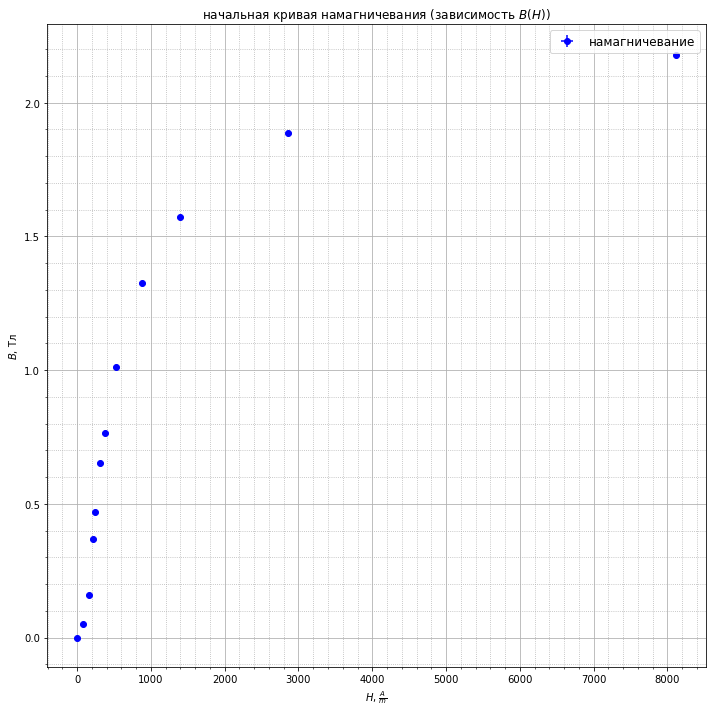

In [7]:
a = 10
plt.figure(figsize=(a, a))
plt.errorbar(H_k, B,B_err , H_k_err, label = 'намагничевание', linestyle='',  marker='o', c = 'b')
plt.title("начальная кривая намагничевания (зависимость $B(H)$)")
plt.ylabel("$B$, Тл")
plt.xlabel("$H$, $\\frac{A}{m}$")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()

In [8]:
B2 = [0]
B_err2 = [0]
for i in range(len(dx2)):
    B2.append(B2[i]+dB(dx2[i]))
    B_err2.append(((dB_err(dx2[i]))**2+(B_err2[i])**2)**0.5)
B2.pop()
B_err2.pop()
H_k2 = [H(i) for i in I2]
H_k2 = [0] + H_k2
H_k_err2 = [H_err(i) for i in I2]
H_k_err2 = [0] + H_k_err2

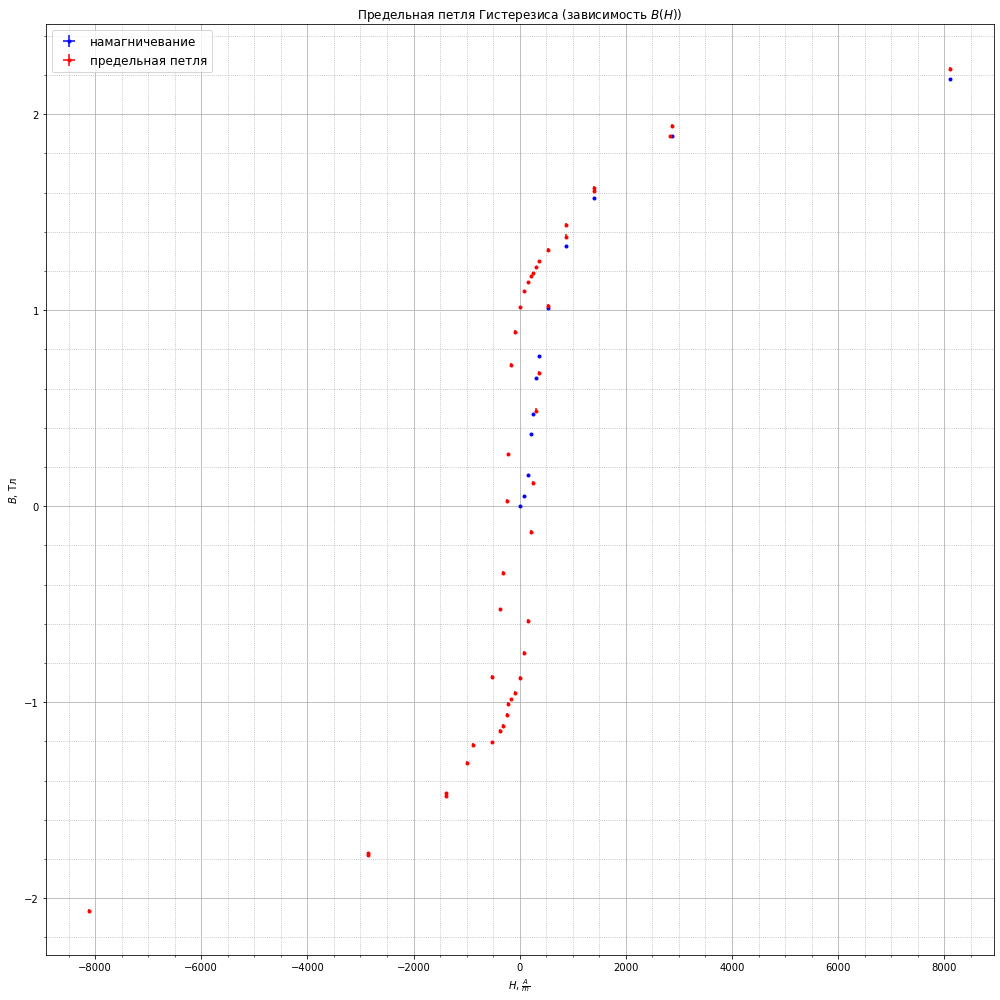

In [9]:
a = 14
plt.figure(figsize=(a, a))
plt.errorbar(H_k, B,B_err , H_k_err, label = 'намагничевание', linestyle='',  marker='.', c = 'b')
plt.errorbar(H_k2[len(B):] , B2[len(B):], B_err2[len(B):], H_k_err2[len(B):], label = 'предельная петля', c = 'red', marker = '.', linestyle='')
plt.title("Предельная петля Гистерезиса (зависимость $B(H)$)")
plt.ylabel("$B$, Тл")
plt.xlabel("$H$, $\\frac{A}{m}$")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()

In [10]:
result = list(filter(lambda x: abs(x) < 0.1, B2))


In [11]:
print (f'$H_c \\approx {abs(H_k2[B2.index(result[2])]):.2f} \\pm {H_k_err2[B2.index(result[2])]:.2f} (\\varepsilon_{{H_{{c}}}} = {H_k_err2[B2.index(result[2])]/abs(H_k2[B2.index(result[2])])*100:.2f}\%) \\frac{{A}}{{m}}$')

$H_c \approx 247.66 \pm 0.11 (\varepsilon_{H_{c}} = 0.04\%) \frac{A}{m}$


In [12]:
n = 1
print (f'$B_s \\approx {B2[B2.index(max(B2))-n]:.3f} \\pm {B_err2[B2.index(max(B2))-n]:.3f} (\\varepsilon_{{B_{{s}}}} = {B_err2[B2.index(max(B2))-n]/B2[B2.index(max(B2))-n]*100:.2f}\%) TL$')

$B_s \approx 1.939 \pm 0.012 (\varepsilon_{B_{s}} = 0.61\%) TL$


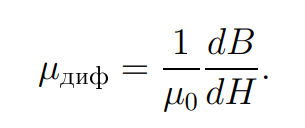

In [115]:
def mu(i):
    return (1/m_0) * ((B2[i+1]-B2[i])/(H_k2[i+1]-H_k2[i]))
def mu_err(i):
    return mu(i) * (((B_err2[i+1]**2 + B_err2[i]**2)**0.5/ (B2[i+1]-B2[i]) )**2 + ((H_k_err2[i+1]**2 + H_k_err2[i]**2)**0.5/ (H_k2[i+1]-H_k2[i]))**2)**0.5
h = [0, 0]
for i in range(len(B)):
    if h[0] < mu(i):
        h = [mu(i), mu_err(i)]

In [116]:
print (f'$ \\mu_{{диф}} \\approx {h[0]:.2f} \\pm {h[1]:.2f} (\\varepsilon_{{\\mu}} = {h[1]/h[0]*100:.2f} \%)$')

$ \mu_{диф} \approx 2722.76 \pm 37.12 (\varepsilon_{\mu} = 1.36 \%)$


$H_c \approx 247.66 \pm 0.38 (\varepsilon_{H_{c}} = 0.16\%) \frac{A}{m}$


$B_s \approx 1.939 \pm 0.117 (\varepsilon_{B_{s}} = 6.06\%) TL$

$ \mu_{диф} \approx 2722.76 \pm 368.88 (\varepsilon_{\mu} = 13.55 \%)$

In [105]:
def p():
    print('-'*(8*5+2+2+4))
p()
print (f'|{"N":^8}|{"dx":^8}|{"I":^8}|{"dB":^8}|{"H":^10}|')
p()
for i, j, n in zip(dx2, [0] + I2, range(1, 1 + len(dx2))):
    print(f'│{n:^8}│{i:^8.3f}│{j:^8.3f}│{dB(i):^8.3f}│{H(j):^10.3f}│')
    p()

------------------------------------------------
|   N    |   dx   |   I    |   dB   |    H     |
------------------------------------------------
│   1    │ 0.023  │ 0.000  │ 0.051  │  0.000   │
------------------------------------------------
│   2    │ 0.048  │ 0.015  │ 0.107  │  85.729  │
------------------------------------------------
│   3    │ 0.094  │ 0.028  │ 0.210  │ 156.579  │
------------------------------------------------
│   4    │ 0.045  │ 0.039  │ 0.101  │ 218.026  │
------------------------------------------------
│   5    │ 0.082  │ 0.044  │ 0.183  │ 247.661  │
------------------------------------------------
│   6    │ 0.050  │ 0.056  │ 0.112  │ 311.721  │
------------------------------------------------
│   7    │ 0.111  │ 0.067  │ 0.248  │ 371.269  │
------------------------------------------------
│   8    │ 0.140  │ 0.095  │ 0.313  │ 528.299  │
------------------------------------------------
│   9    │ 0.110  │ 0.157  │ 0.246  │ 875.949  │
--------------------

# Работа 3.2.1
# Сдвиг фаз в цепи переменного тока

## RC цепь

In [4]:
C_1 = 0.5 * 10 ** -6
v_1 = 10**3
x_pogr = 0.5

In [5]:
data = []
with open('3_2_1_RC.txt') as f:
    f.readline()
    for j in f:
        dat = list(map(float, (j.split())))
        data.append(dat)

$ctg \psi = \omega CR_{\sum}$

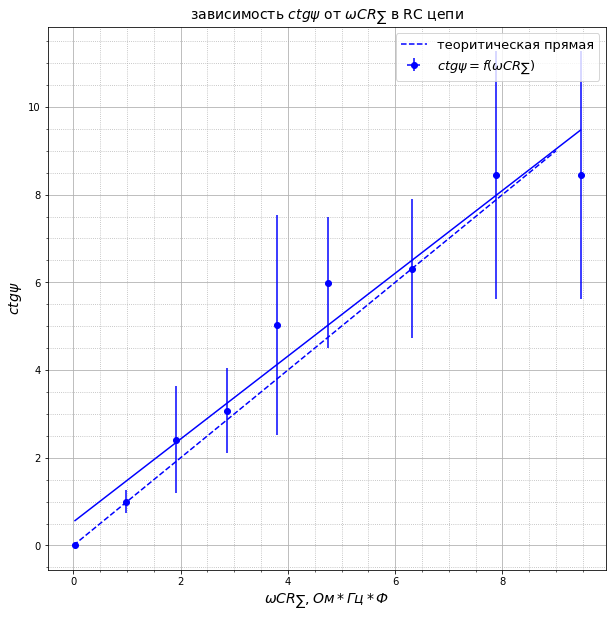

In [9]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_xlabel("$\\omega CR_{\\sum}, Ом*Гц*Ф}$", fontsize=14)
fig.set_ylabel("$ctg \\psi$", fontsize=14)
fig.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
fig.set_title("зависимость $ctg\\psi$ от $\\omega CR_{\\sum}$ в RC цепи", fontsize=14)
x = [2* math.pi * C_1 * v_1 * (R+10) for R, x_0, x in data]
y = [1/math.tan(math.pi*x/x_0) for R, x_0, x in data]
err_y = [y[i] * ((x_pogr/data[i][1])**2 + (x_pogr/data[i][2])**2)**0.5 for i in range(len(x))]
k = MNK(x, y, [0]*len(x), err_y,  fig, '$ctg \\psi = f(\\omega CR_{\\sum}) $', 'b')
plt.plot([i for i in range(0, 10)], [i for i in range(0, 10)], label = 'теоритическая прямая', c = 'blue', linestyle = '--')
fig.legend(fontsize = 13)
plt.show()

In [ ]:
print(f'{"R":^4} {"x_0":^4} {"x":^4}')
for R, x_0, x in data:
    print(f'{R:4} {x_0:4} {x:4}')

## RL цепь

In [14]:
L_2 = 50 * 10 ** -3
R_L = 31.5
v_2 = 10**3
x_pogr = 0.5

In [15]:
data = []
with open('3_2_1_RL.txt') as f:
    f.readline()
    for j in f:
        dat = list(map(float, (j.split())))
        data.append(dat)

In [16]:
def x_pogr_otn (x):
    if x != 0:
        return abs(x_pogr/x)
    else:
        return 0

$ ctg \psi = \frac{R_{\sum}}{\omega L} $

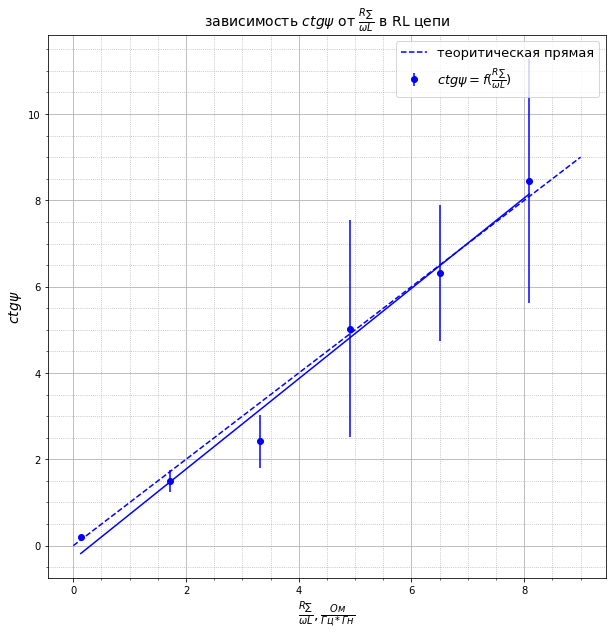

In [17]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_xlabel("$\\frac{R_{\\sum}}{\\omega L}, \\frac{Ом}{Гц*Гн}$", fontsize=14)
fig.set_ylabel("$ctg \\psi$", fontsize=14)
fig.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
fig.set_title("зависимость $ctg\\psi$ от $\\frac{R_{\\sum}}{\\omega L}$ в RL цепи", fontsize=14)
x = [(R+10+R_L)/(2* math.pi * v_2 * L_2) for R, x_0, x in data]
y = [1/math.tan(math.pi*x/x_0) for R, x_0, x in data]
err_y = [y[i] * ((x_pogr_otn (data[i][1]))**2 + (x_pogr_otn (data[i][2]))**2)**0.5 for i in range(len(x))]
k = MNK(x, y, None, err_y,  fig, '$ctg \\psi = f(\\frac{R_{\\sum}}{\\omega L})$', 'b')
plt.plot([i for i in range(0, 10)], [i for i in range(0, 10)], label = 'теоритическая прямая', c = 'blue', linestyle = '--')
fig.legend(fontsize = 13)
plt.show()

In [31]:
print(f'{"R":^4} {"x_0":^4} {"x":^4}')
for R, x_0, x in data:
    print(f'{R:4} {x_0:4} {x:4}')

 R   x_0   x  
 0.0  8.0  3.5
500.0 16.0  3.0
1000.0 16.0  2.0
1500.0 16.0  1.0
2000.0 40.0  2.0
2500.0 40.0  1.5


## RLC

In [19]:
v_0 = 1006.58

In [20]:
data = []
with open('3_2_1_RLC.txt') as f:
    f.readline()
    f.readline()
    f.readline()
    f.readline()
    for j in f:
        dat = list(map(float, (j.split())))
        data.append(dat)
data.sort()
data2 = []
with open('3_2_1_RLC2.txt') as f:
    f.readline()
    for j in f:
        dat = list(map(float, (j.split())))
        data2.append(dat)
data2.sort()

[0.8941167120348109, 0.9139859723022512, 0.9338552325696914, 0.9537244928371317, 0.9735937531045719, 1.0928093147092133, 1.1126785749766537, 1.1325478352440939, 1.152417095511534, 1.1921556160464146] [0.375, 0.3125, 0.25, 0.1875, 0.125, 0.2857142857142857, 0.2857142857142857, 0.2857142857142857, 0.34285714285714286, 0.37142857142857144]


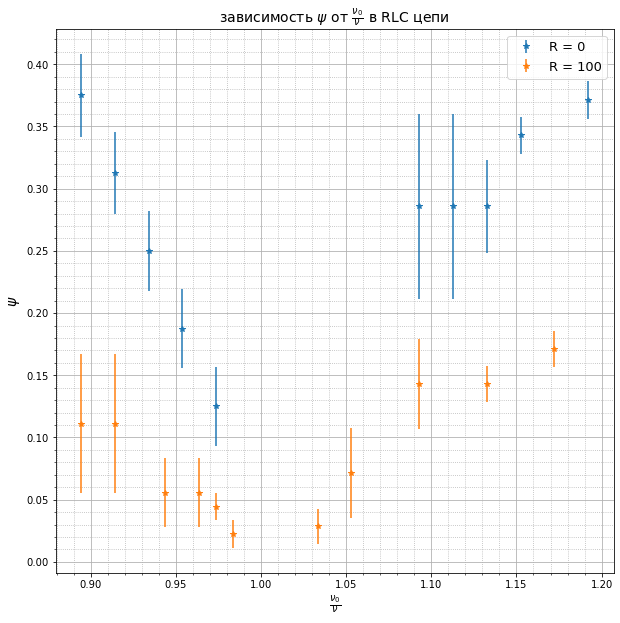

In [34]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_xlabel("$\\frac{\\nu_0}{\\nu}$", fontsize=14)
fig.set_ylabel("$\\psi$", fontsize=14)
fig.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
fig.set_title("зависимость $\\psi$ от $\\frac{\\nu_0}{\\nu}$ в RLC цепи", fontsize=14)

x = [v/v_0 for v, x_0, x in data]
y = [(math.pi*x/x_0)/(math.pi) for v, x_0, x in data]
print(x, y)
err_y = [y[i] * ((x_pogr_otn (data[i][1]))**2 + (x_pogr_otn (data[i][2]))**2)**0.5 for i in range(len(x))]
plt.errorbar(x, y, err_y, label = 'R = 0', linestyle = '', marker = '*')

x = [v/v_0 for v, x_0, x in data2]
y = [(math.pi*x/x_0)/(math.pi) for v, x_0, x in data2]
err_y = [y[i] * ((x_pogr_otn (data2[i][1]))**2 + (x_pogr_otn (data2[i][2]))**2)**0.5 for i in range(len(x))]
plt.errorbar(x, y, err_y, label = 'R = 100', linestyle = '', marker = '*')

# plt.plot([i for i in range(0, 10)], [i for i in range(0, 10)], label = 'теоритическая прямая', c = 'blue', linestyle = '--')
fig.legend(fontsize = 13)
plt.show()

In [22]:
Q = round(1/(1.065-0.9139859723022512), 2)

In [36]:
Q

6.62

In [37]:
Q_t = round(1/(10+R_L)*((L_2/C_1)**0.5), 2)

In [39]:
Q_t

7.62

# Работа 3.3.5

# Эффект Холла в металах

In [193]:
def ml_raz(a):
    return 2
def err_i(i):
    return abs(0.002*i+2*10**(-ml_raz(i)))

In [208]:
I, B = [1.2, 1, 0.8, 0.6, 0.4, 0.2], [925, 880, 785, 638, 416, 219]
I, B = I[::-1], B[::-1]

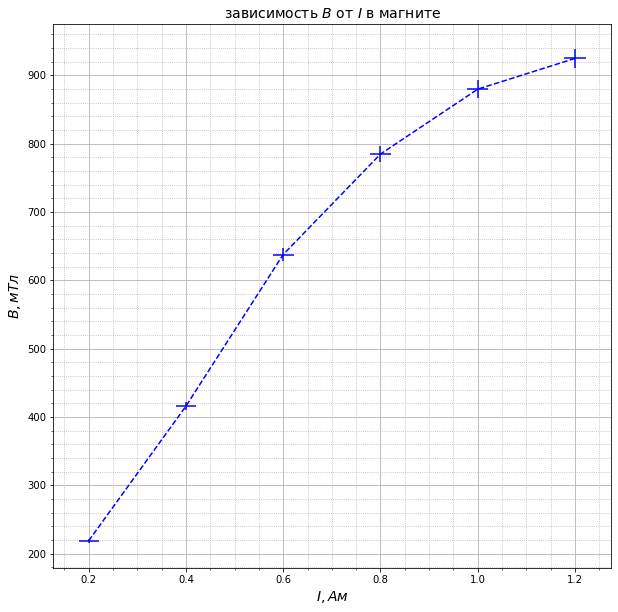

In [211]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_ylabel("$B, мТл$", fontsize=14)
fig.set_xlabel("$I, Ам$", fontsize=14)
fig.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
fig.set_title("зависимость $B$ от $I$ в магните", fontsize=14)
fig.errorbar(I, B, [b*0.015 for b in B], [err_i(i) for i in I], c = 'b', label = 'B(I)', linestyle = '--')
# k = MNK(I, B, [err_i(i) for i in I], [b*0.015 for b in B], fig, 'B(I)', 'b')
def i_to_B (i):
    return B[i], 0.10*B[i]

In [212]:
I_0 = [0.6, 0.5, 0.39, 0.3, 0.1]
U_0 = [1, 4, 2, 1, 1]

In [213]:
I = [
    [0.19, 0.4, 0.6, 0.8, 1, 1.2],
    [0.2, 0.4, 0.6, 0.8, 1, 1.2],
    [0.18, 0.37, 0.57, 0.81, 1.01, 1.18],
    [0.19, 0.38, 0.6, 0.83, 1.01, 1.19],
    [0.19, 0.38, 0.57, 0.81, 1, 1.19]
]
U = [
    [8, 12, 15, 18, 20, 22],
    [6, 11, 13, 16, 17, 18],
    [4, 7, 9, 11, 13, 14],
    [3, 5, 7, 9, 10, 11],
    [3, 4, 5, 7, 8, 9]
]

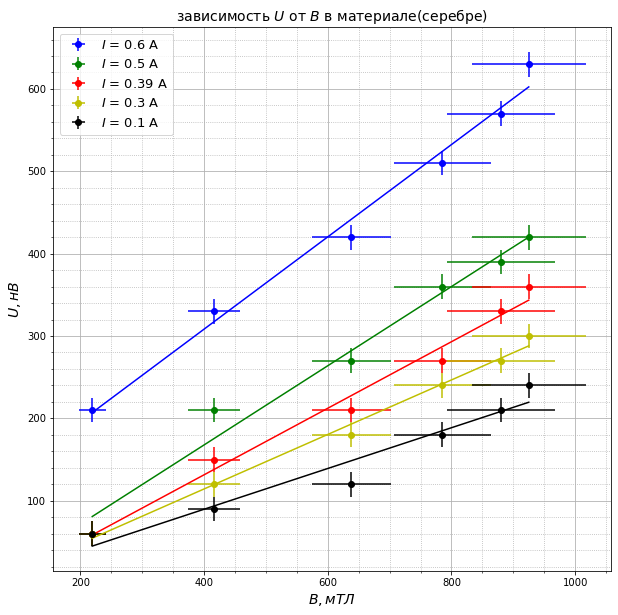

In [214]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_ylabel("$U, нВ$", fontsize=14)
fig.set_xlabel("$B, мТЛ$", fontsize=14)
fig.minorticks_on()
fig.set_title("зависимость $U$ от $B$ в материале(серебре)", fontsize=14)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
C = 'bgrykmc'
koef = []
for i, u, u_0, i_0, col in zip(I, U, U_0, I_0, C):
    koef.append(MNK([i_to_B(i.index(k))[0] for k in i], [3000*(k-u_0)/100 for k in u], [i_to_B(i.index(k))[1] for k in i], [3000/200 for k in u], fig, '$I$ = '+ str(i_0)+' А', col))
fig.legend(fontsize = 13)

In [215]:
dko = []
ko = []
i_end = []
print(f'{"I, A":^10}{"dI, A":^10}{"k, мкВ/Тл":^10}{"dk, мкВ/Тл":^10}')
for i, k, dk in zip(I_0, [i[0] for i in koef], [i[-1] for i in koef]):
    k = round(k, 2)
    dk = round(dk, 2)
    i_end.append(i)
    ko.append(k)
    dko.append(dk)
    print(f"{i:^10}{err_i(i):^10.2f}{k:^10}{dk:^10}")

   I, A     dI, A   k, мкВ/Тл dk, мкВ/Тл
   0.6       0.02      0.56      0.03   
   0.5       0.02      0.48      0.03   
   0.39      0.02      0.4       0.02   
   0.3       0.02      0.33      0.01   
   0.1       0.02      0.25      0.03   


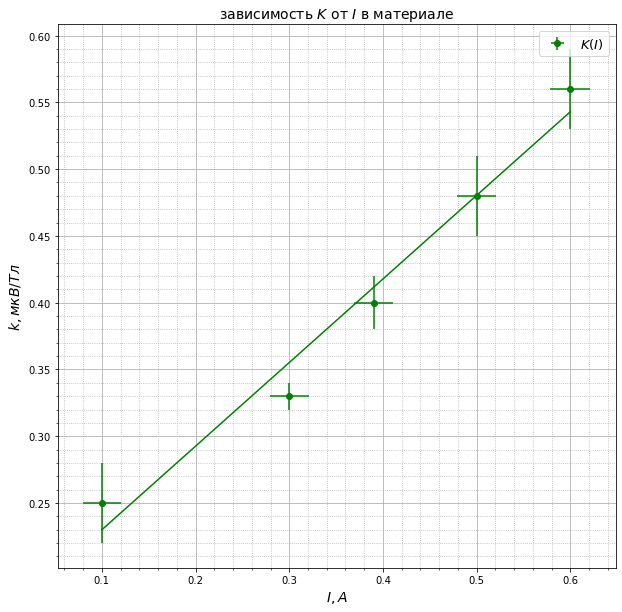

In [216]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_ylabel("$k, мкВ/Тл$", fontsize=14)
fig.set_xlabel("$I, A$", fontsize=14)
fig.minorticks_on()
fig.set_title("зависимость $K$ от $I$ в материале", fontsize=14)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
fin_k = MNK(i_end, ko, [err_i(o) for o in i_end], dko, fig, '$K(I)$', 'g')
fig.legend(fontsize = 13)

In [217]:
a = 0.14 #мм
print(' k    dk    R    dR')
print(round(fin_k[0], 2 ),  round(fin_k[-1], 2), round(-fin_k[0]*a*10**2, 2 ), round(fin_k[-1]*10**2*a, 2 ))

 k    dk    R    dR
0.63 0.04 -8.76 0.62


In [218]:
i = [0.18, 0.39, 0.61, 0.84, 1, 1.2]
u = [25, 23, 21, 19, 18, 17]
u_0 = 29
i_0 = 0.65

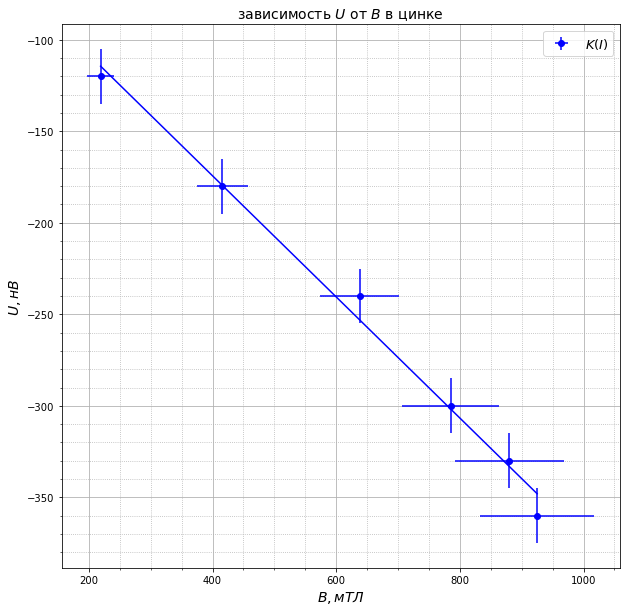

In [219]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_ylabel("$U, нВ$", fontsize=14)
fig.set_xlabel("$B, мТЛ$", fontsize=14)
fig.minorticks_on()
fig.set_title("зависимость $U$ от $B$ в цинке", fontsize=14)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
fin_k = MNK([i_to_B(i.index(k))[0] for k in i], [3000*(k-u_0)/100 for k in u], [i_to_B(i.index(k))[1] for k in i], [3000/200 for k in u], fig, '$K(I)$', 'b')
fig.legend(fontsize = 13)

In [220]:
a = 0.08 #мм
print(' k    dk    R    dR')
print(round(fin_k[0], 2 ),  round(fin_k[-1], 2), round(-fin_k[0]*a*10**2, 2 ), round(fin_k[-1]*10**2*a, 2 ))

 k    dk    R    dR
-0.33 0.01 2.65 0.1


# Лаба 3.3.1 

# Измерение удельного заряда электрона

## Аннотация

### Цель работы

Определение удельного заряда электрона с помощью метода магнитной факусировки и магнитрона

### В работе используются

электронно-лучевая трубка и блок питания к ней; источник постоянного тока; соленоид; электростатический вольтметр; милливеберметр;
ключи.

# Теоретические сведения

### Метод Магнитной фокусировки

Здесь удельный заряд электрона определяется по формуле
$$\dfrac{e}{m_e} = \dfrac{8\pi^2V}{l^2} \left(\dfrac{n^2}{B_{\text{ф}}^2} \right),$$

где $V$ - ускоряющий потенциал в электронной трубке, $l$ - путь электрона, $B_{\text{ф}}$ - фокусирующее поле, $n$ - номер фокуса.


### Описание установки

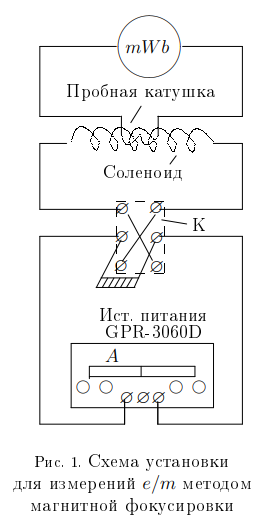

Основной частью установки является электронный осциллограф, трубка которого вынута и установлена в длинном соленоиде, создающим магнитное поле. Напряжение на отклоняющие пластины и питание подводятся к трубке многожильным кабелем.

Пучок электронов, вылетающих из катода с разными скоростями, ускоряется анодным напряжением. Пропустив пучок сквозь две узкие диафрагмы, можно выделить электроны с практически одинаковой продольной скоростью. Небольшое переменное напряжение, поступающее с клеммы "Контрольный сигнал" осциллографа на отклоняющие пластины, изменяет только поперечную составляющую скорости. При увеличении магнитного поля линия на экране стягивается в точку, а затем снова удлиняется. 

Магнитное поле создается постоянным током, величина которого регулируется ручками источника питания и измеряется амперметром. Ключ служит для изменения направления поля в соленоиде.

Величина магнитного поля определяется с помощью милливеберметра.

На точность результатов может влиять внешнее магнитное поле, особенно продольное. 

Измерения магнитного поля с помощью милливеберметра обычно проводятся в предварительных опыта: при отключении ключа устанавливается связь между силой тока и индукцией магнитного поля в соленоиде. 


### Метод магнетрона

Здесь удельный заряд электрона определяется по формуле
$$\dfrac{e}{m_e} = \dfrac{8V_a}{B_{\text{кр}}^2r_a^2},$$

где $V_a$ - анодное напряжение, $B_{\text{кр}}$ - критическое поле, $r_a$ - радиус анода.


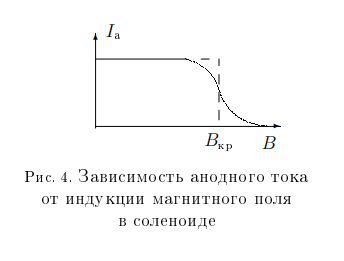

#### Описание установки

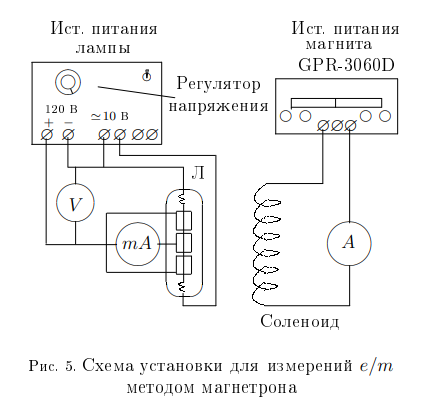

Два крайних цилиндра изолированы от среднего небольшими зазорами и используются для устранения краевых эффектов на торцах среднего цилиндра, ток с которого используется при измерениях. В качестве катода используется тонкая вольфрамовая проволока. Катод разогревается переменным током, отбираемым от стабилизированного источника питания. 

С этого же источника на анод лампы подается напряжение, регулируемое с помощью потенциометра и измеряемое вольтметром.

Индукция магнитного поля в соленоиде рассчитывается по току $I_m$, протекающему через обмотку соленоида. Коэффициент пропорциональности между ними указан в установке.

Лампа закреплена в соленоиде. Магнитное поле в соленоиде создается постоянным током, сила которого регулируется ручками источника питания и измеряется амперметром.


# Результаты измерений и обработка данных

# метод магнитной фокусировки

Прокалибруем электромагнит. определим связь между индукцией $B$ магнитного поля в соленоиде и током $I$ через обмотки магнита. Для этого с помощью милливеберметра снимем зависимость магнитного потока $\Phi = BSN$, пронизывающего пробную катушку, находящуюся в магнитном поле, от тока $I$.
Величину $SN$ (произведение площади сечения пробной катушки на число витков в ней) возьмем на установке.\
$B = \frac{\Phi}{SN}$

In [71]:
SN = 0.3 # м^2
d_I = 0.01 # погр I в А
d_phi = 0.01 # погр phi в мВб
data = {'phi': [0.35, 0.75, 1, 1.4, 1.65, 2, 2.3, 2.5, 3.1, 3.5, 3.8, 4, 4.35, 4.7, 5.2],                # phi(мВб) 
        'I': [0.35, 0.71, 0.91, 1.31, 1.60, 1.97, 2.19, 2.43, 2.94, 3.46, 3.59, 3.83, 4.16, 4.46, 4.89]} # I(A)
data['B'] = [phi/SN for phi in data['phi']] # B (мТл)
d_B = d_I/SN

Построим график  $B$ от $I$

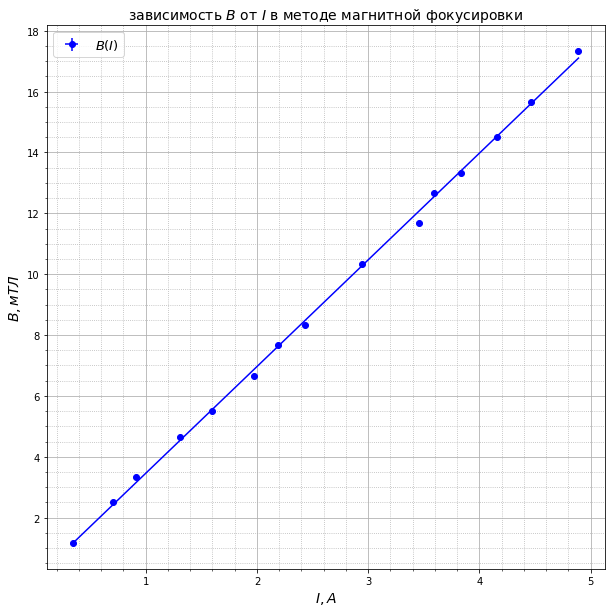

In [72]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_ylabel("$B, мТЛ$", fontsize=14)
fig.set_xlabel("$I, A$", fontsize=14)
fig.minorticks_on()
fig.set_title("зависимость $B$ от $I$ в методе магнитной фокусировки", fontsize=14)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
k = MNK(data['I'], data['B'], [d_I]*len(data['I']), [d_B]*len(data['I']), fig, '$B(I)$', 'b')
fig.legend(fontsize = 13)

выпишем в отдельную функцию B(I) и ее погрешность

In [73]:
B = lambda i: (k[0]*i + k[1], ( (k[0]*i*((d_I/i)**2 + (k[-1]/k[0]))**0.5)**2 + k[3]**2)**0.5)

Установим минимальный ток через соленоид и, постепенно увеличивая его, найдём значение тока $I_\phi$, при котором линия первый раз стягивается в точку (сила тока $I_\phi$ зависит, конечно, от ускоряющего напряжения $V$, а величина $V$ меняется с изменением яркости луча, поэтому не будем изменять яркость до конца измерений). Продолжая увеличивать ток, снимем зависимость $I_\phi$ от порядкового номера фокуса n. так же проделаем для поля в другом направлении.

In [74]:
data['I_phi_1'] = [0.66, 1.36, 2.06, 2.73, 3.35, 3.95, 4.58]
data['I_phi_2'] = [0.66, 1.31, 2.01, 2.73, 3.34, 3.91, 4.52]

Запишем так же параметры установки $V$ и $l$

In [75]:
V = 0.65 * 10**3 # В
l = 26.5*10**-2 # м

Построим графики зависимости $B$ от $n$, и найдем $\left(\frac{n}{B}\right)^2$

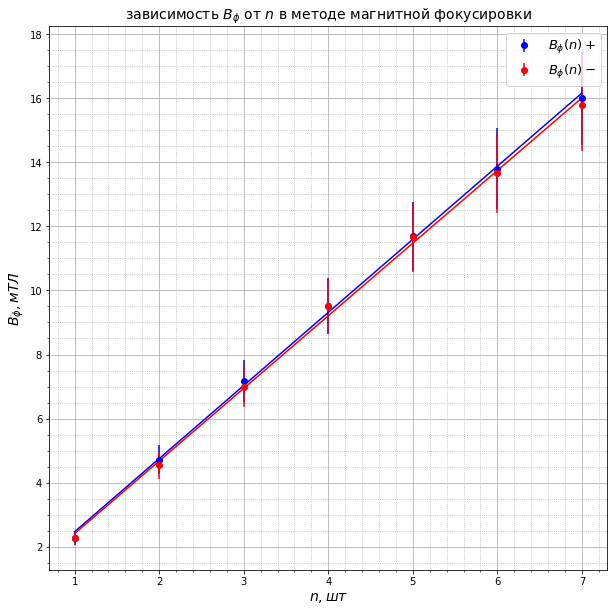

In [76]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_ylabel("$B_\phi, мТЛ$", fontsize=14)
fig.set_xlabel("$n, шт$", fontsize=14)
fig.minorticks_on()
fig.set_title("зависимость $B_\phi$ от $n$ в методе магнитной фокусировки", fontsize=14)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')
k1 = [0, 0]
k1[0] = MNK(list(range(1, len(data['I_phi_1'])+1)), [B(i)[0] for i in data['I_phi_1']], None, [B(i)[1] for i in data['I_phi_1']], fig, '$B_\phi(n) +$', 'b')
k1[1] = MNK(list(range(1, len(data['I_phi_2'])+1)), [B(i)[0] for i in data['I_phi_2']], None, [B(i)[1] for i in data['I_phi_2']], fig, '$B_\phi(n) -$', 'r')

fig.legend(fontsize = 13)

запишем $n/B$ для обоих графиков

In [77]:
nb1 = 1/k1[0][0]
nb2 = 1/k1[1][0]

используя формулу


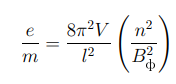

где $V$ - ускоряющий потенциал в электронной трубке, $l$ - путь электрона, $B_\phi$ - фокусирующее поле, $n$ - номер фокуса

расчитаем значения $\frac{e}{m}$ и сравним с табличными ($1.76 * 10^{11}Кл/Кг$)

In [78]:
em1 = ( (8*math.pi**2*V)/l**2) * nb1**2
em2 = ( (8*math.pi**2*V)/l**2) * nb2**2

In [213]:
print(f'$$\\frac {{e}}{{m}} = {em1/100000:.1f} \\pm { em1*(2*(k1[0][-1]))**0.5/100000:.1f} (\epsilon = {100-em1/100000/1.76*100:.2f}%)$$')
print(f'$$\\frac {{e}}{{m}} = {em2/100000:.1f} \\pm { em2*(2*(k1[1][-1]))**0.5/100000:.1f} (\epsilon = {100-em2/100000/1.76*100:.2f}%)$$')

$$\frac {e}{m} = 1.4 \pm 0.3 (\epsilon = 20.30%)$$
$$\frac {e}{m} = 1.4 \pm 0.4 (\epsilon = 19.24%)$$


$$\frac {e}{m} = 1.4 \pm 0.3  Кл/Кг * 10^{11}(\varepsilon_Т = 20.30\%)$$
$$\frac {e}{m} = 1.4 \pm 0.4  Кл/Кг * 10^{11}(\varepsilon_Т = 19.24\%)$$

# Метод магнетрона

Тут удельный заряд электрона сичтается по формуле
$$ \frac{e}{m} = \frac{8V_a}{B^{2}_{кр}r^{2}_{a}} $$
где $V_a$ - анодное напряжение, $B_{кр}$ - критическое поле, а $r_a$ - радиус анода

измерим для разных $V_a$ анодный ток, от тока через соленоид

In [199]:
K = 3.5 * 10**-2 #Т/А|  коэф для I_m в B
r_a = 12 * 10**-4 # м 

Введем данные и обработаем их, чтоб использовать далее

In [200]:
data = {70:{'i_a':[290, 285, 280, 280, 275, 260, 220, 90, 60, 40, 20, 10, 8, 6, 1, 0, 180], 
            'i_m':[0, 0.04, 0.076, 0.12, 0.124, 0.128, 0.13, 0.132, 0.134, 0.136, 0.14, 0.144, 0.152, 0.156, 0.18, 0.2, 0.131]
        },
        80:{
            'i_a':[280, 280, 280, 274, 264, 208, 56, 70, 30, 10, 8, 6, 0],
            'i_m':[0, 0.112, 0.06, 0.128, 0.136, 0.14, 0.144, 0.142, 0.148, 0.156, 0.16, 0.164, 0.2]
        },
        100:{
            'i_a':[290, 290, 290, 290, 286, 210, 40, 60, 84, 10, 3, 0],
            'i_m':[0, 0.052, 0.1, 0.12, 0.136, 0.156, 0.164, 0.16, 0.158, 0.18, 0.196, 0.236]
        },
        120:{
            'i_a':[290, 290, 290, 280, 280, 135, 58, 34, 16, 2, 0],
            'i_m':[0, 0.05, 0.1, 0.16, 0.168, 0.172, 0.176, 0.18, 0.188, 0.232, 0.29]
        },
        90:{
            'i_a':[230, 230, 230, 230, 230, 224, 160, 28, 50, 10, 3, 0],
            'i_m':[0, 0.005, 0.1, 0.116, 0.124, 0.136, 0.148, 0.156, 0.152, 0.168, 0.188, 0.23]
        }
       }
# B(мТл)

In [201]:
for i in data:
    data[i]['i_a'] = sorted(data[i]['i_a'])[::-1]
    data[i]['i_m'] = sorted(data[i]['i_m'])

Получим $B$ для дальнейшей работы

In [202]:
for dat in data:
    data[dat]['B'] = [round(i * K * 1000, 3) for i in data[dat]['i_m']]

Построим график для определения $B_{кр}$ в зависимости от $V_a$

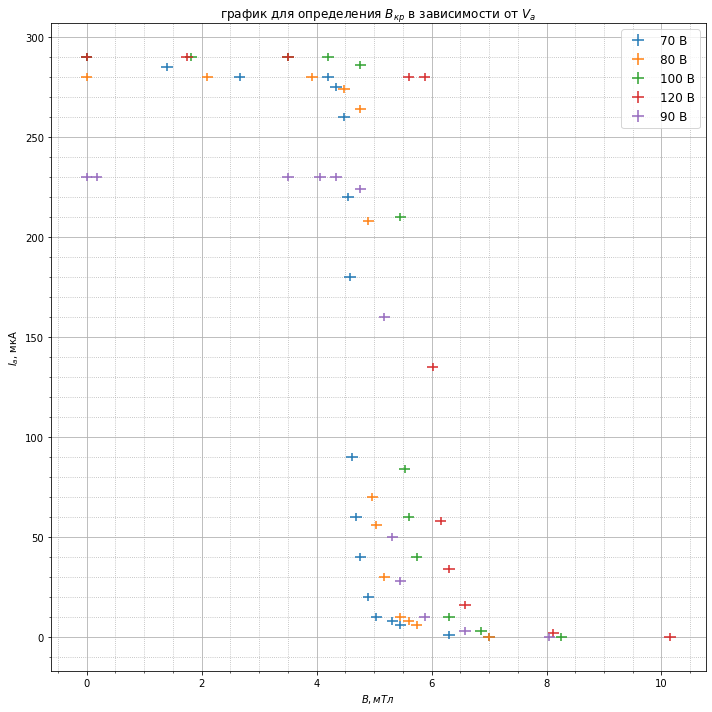

In [207]:
a = 10
plt.figure(figsize=(a, a))
plt.title("график для определения $B_{кр}$ в зависимости от $V_a$")
plt.ylabel("$I_a$, мкА")
plt.xlabel("$B, мТл$")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

for dat, N in zip(data.values(), data.keys()):
    plt.errorbar(dat['B'], dat['i_a'], [2]*len(dat['B']), [0.1]*len(dat['B']), label = str(N) + ' В', linestyle = '')
    
plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()

Построим красивый график

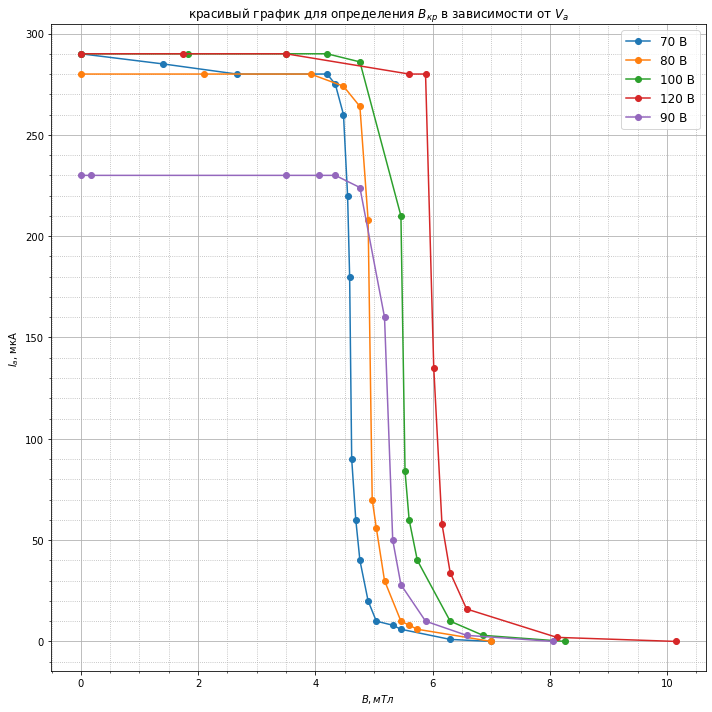

In [208]:
a = 10
plt.figure(figsize=(a, a))
plt.title("красивый график для определения $B_{кр}$ в зависимости от $V_a$")
plt.ylabel("$I_a$, мкА")
plt.xlabel("$B, мТл$")
plt.minorticks_on()
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

for dat, N in zip(data.values(), data.keys()):
    plt.plot(dat['B'], dat['i_a'], '-o', label = str(N) + ' В')
    
plt.legend(fontsize = 12)
plt.tight_layout()
plt.show()

Найдем критические точки

In [205]:
n_of_B_kr = [8, 6, 6, 6, 7]
b_kr = []
b_kr_err = []
v_kr = []
for n, v in zip(n_of_B_kr, data.keys()):
        v_kr.append(v)
        b_kr.append((data[v]['B'][n]/1000)**2 * 10**5)
        b_kr_err.append((data[v]['B'][n]/1000)**2 * ((0.1/data[v]['B'][n]*2)**2)**0.5 * 10**5)
v_kr.sort()
b_kr.sort()
b_kr_err.sort()


Построим график зависимости $B^{2}_{кр}$ от $V_a$ для определения $ \frac {B^{2}_{кр}}{V_a}$

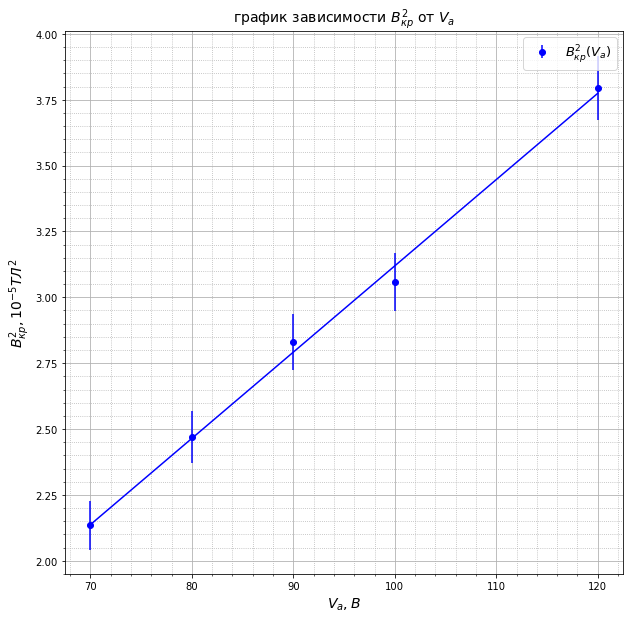

In [209]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_ylabel("$B^{2}_{кр},10^{-5} ТЛ^2$", fontsize=14)
fig.set_xlabel("$V_a, B$", fontsize=14)
fig.minorticks_on()
fig.set_title("график зависимости $B^{2}_{кр}$ от $V_a$", fontsize=14)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

G = MNK(v_kr, b_kr, None, b_kr_err, fig, lab = '$B^{2}_{кр}(V_a)$', color = 'b')

fig.legend(fontsize = 13)

Рассчитаем удельный заряд электрона и сравним с табличными



In [211]:
em = (8/r_a**2) * k[0]**-1 * 10**-6

In [212]:
print(f'$$\\frac {{e}}{{m}} = {em:.1f} \\pm { (8/(r_a*100)**2)*(G[-1]):.1f} (\\varepsilon = {100-em/1.76*100:.2f}\\%)$$')

$$\frac {e}{m} = 1.6 \pm 0.5 (\varepsilon = 9.96\%)$$


$$\frac {e}{m} = 1.6 \pm 0.5 Кл/Кг * 10^{11}(\varepsilon_Т = 9.96\%)$$

# Вывод

В данной лабораторной работе, мы с удивительной точностью определили удельный заряд электрона двумя методами.
Оба метода давольно хороши и дают близкие к теоритическим результаты. Данные результаты показывают предельную точность теоритических выкладок

Метод магнитной фокусировки

$$\frac {e}{m} = 1.4 \pm 0.4 Кл/Кг * 10^{11}(\varepsilon = 28.57\%)$$
Табличное значение: ($1.76 * 10^{11}Кл/кг$)

$\Delta = 0.36$Кл/Кг * 10^{11}

$\varepsilon \approx 20$%

 Метод магнетрона 
 $$\frac {e}{m} = 1.6 \pm 0.6 Кл/Кг * 10^{11}(\varepsilon = 31.25\%)$$
Табличное значение: ($1.76 * 10^{11}Кл/кг$)

$\Delta = 0.16 Кл/Кг * 10^{11}$

$\varepsilon \approx 9.96$%

Измерения получились довольно точные, в пределах погрешности совпадают с табличными.

# Лаба 3.6.1

In [21]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import math
import pandas as pd

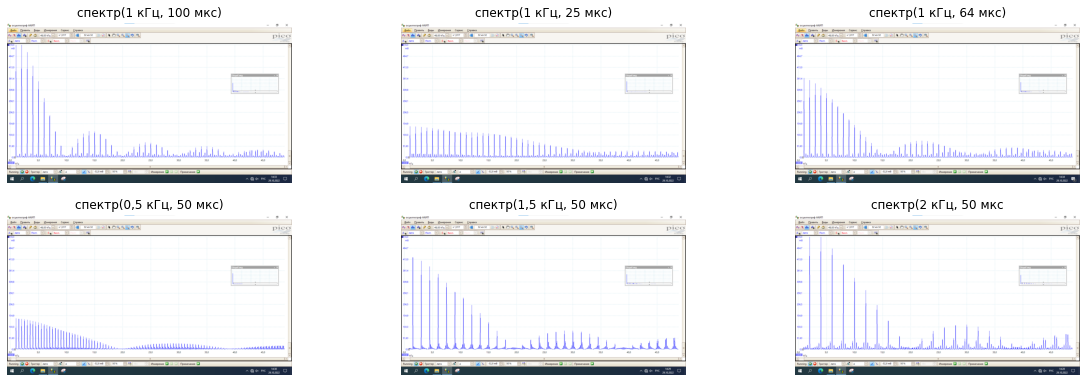

In [38]:


pictures = os.listdir('pic_A/A7/')
pictures = list(filter(lambda x: os.path.isfile('pic_A/A7/' + x), pictures))
pictures = sorted(pictures, key=lambda x: '50' in x)

# Создадим фигуру размером 16 на 4 дюйма
pic_box = plt.figure(figsize=(20,10))

# Поочередно считываем в переменную picture имя изображения из списка pictures. В переменную i записываем номер итерации
for i, picture in enumerate(pictures):
    # считываем изображение в picture
    picture1 = Image.open('pic_A/A7/' + picture)
    # добавляем ячейку в pix_box для вывода текущего изображения
    a = pic_box.add_subplot(3,3,i+1)
    a.set_title(picture.replace('.png', ''))
    plt.imshow(picture1)
    # отключаем отображение осей
    plt.axis('off')
plt.show() 

## A10

In [1]:
import numpy as np

In [2]:
delta_n = np.array([4.987, 5.803, 6.991, 8.053, 10.04, 13.5, 20.15])     # kHz
tau = np.array([200, 175, 150, 125, 100, 75, 50])         # mkSec
obrat_tau = 1/tau

In [5]:
for i in delta_n:
    print(i, end = ' & ')
print()
for i in tau:
    print(i, end = ' & ')
    

4.987 & 5.803 & 6.991 & 8.053 & 10.04 & 13.5 & 20.15 & 
200 & 175 & 150 & 125 & 100 & 75 & 50 & 

In [8]:
def prepare_plot(name_x, name_y):
    fig, ax = plt.subplots(figsize = (10, 8))
    ax.minorticks_on()
    ax.grid(which = 'major')
    ax.grid(which = 'minor', linestyle = ':')
    ax.set_ylabel(name_x)
    ax.set_xlabel(name_y)
    return ax
def drow_line(ax_cur, x, y, x_err, y_err, line_color):
    ax_cur.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', color=line_color)
    p = np.polyfit(x, y, 1)
    ya = np.polyval(p, x)
    ax_cur.plot(x, ya, linestyle='dashed', color=line_color)
    k = (ya[1] - ya[0]) / (x[1] - x[0])
    print(k, '(' + line_color + ')')

NameError: name 'MNK' is not defined

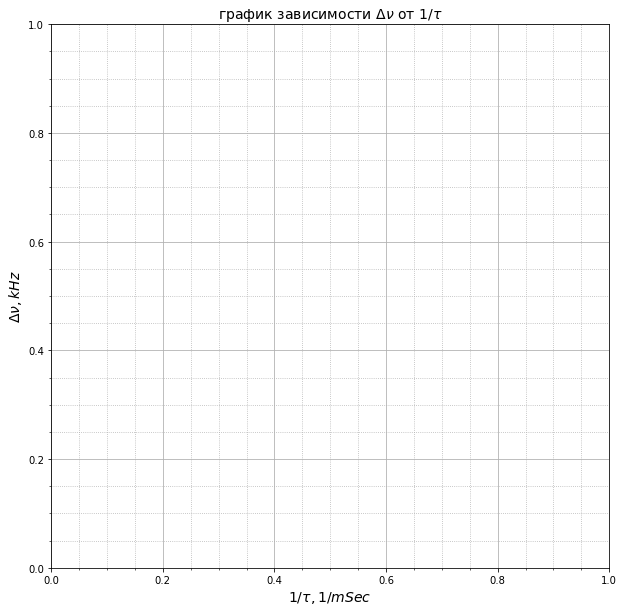

In [12]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_ylabel("$\Delta \\nu, kHz$", fontsize=14)
fig.set_xlabel("$1/\\tau, 1/mSec$", fontsize=14)
fig.minorticks_on()
fig.set_title("график зависимости $\Delta \\nu$ от $1/\\tau$", fontsize=14)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

G = MNK(obrat_tau * 1000, delta_n, None, None, fig, lab = '$\Delta \\nu(1/\\tau)$', color = 'b')

fig.legend(fontsize = 13)
print(f'k = {G[0]:.3f} +- {G[-1]:.3f}(eps = {G[-1]/G[0]*100:.3f}%)')

## B14

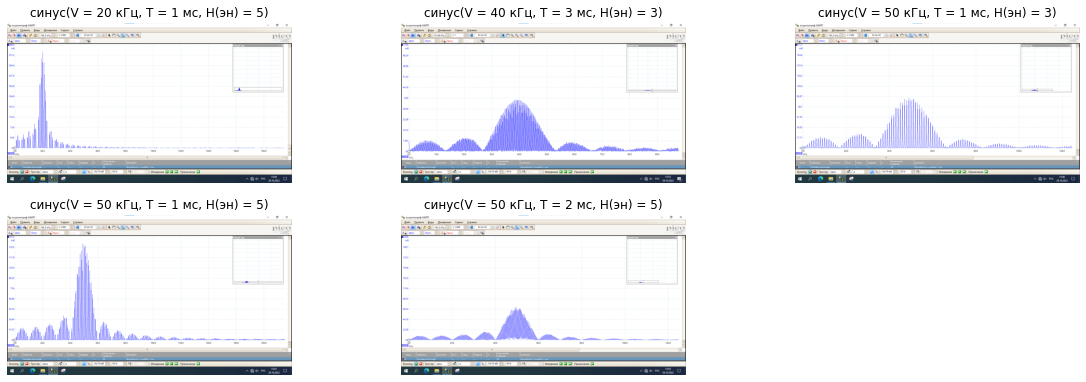

In [20]:
pictures = os.listdir('pic_B_14/')
pictures = list(filter(lambda x: os.path.isfile('pic_B_14/' + x), pictures))
pictures = sorted(pictures, key=lambda x: '50' in x)

# Создадим фигуру размером 16 на 4 дюйма
pic_box = plt.figure(figsize=(20,10))

# Поочередно считываем в переменную picture имя изображения из списка pictures. В переменную i записываем номер итерации
for i, picture in enumerate(pictures):
    # считываем изображение в picture
    picture1 = Image.open('pic_B_14/' + picture)
    # добавляем ячейку в pix_box для вывода текущего изображения
    a = pic_box.add_subplot(3,3,i+1)
    a.set_title(picture.replace('.png', ''))
    plt.imshow(picture1)
    # отключаем отображение осей
    plt.axis('off')
plt.show() 

In [6]:
import pandas as pd

In [14]:
data = pd.DataFrame()
data["T"] = np.array([3, 0.2, 0.8, 1.6, 2, 2.5, 3.2, 3.8, 5, 4.5])
data["1/T"] = 1/data["T"]
data["nu"] = np.array([0.325, 5, 1.236, 0.617, 0.471, 0.381, 0.303, 0.284, 0.197, 0.224])
data.sort_values(by="T")


,T,1/T,nu
1,0.2,5.000000,5.000
2,0.8,1.250000,1.236
3,1.6,0.625000,0.617
4,2.0,0.500000,0.471
5,2.5,0.400000,0.381
0,3.0,0.333333,0.325
6,3.2,0.312500,0.303
7,3.8,0.263158,0.284
9,4.5,0.222222,0.224
8,5.0,0.200000,0.197


In [15]:
for i in data['nu']:
    print(i, end = ' & ')

0.325 & 5.0 & 1.236 & 0.617 & 0.471 & 0.381 & 0.303 & 0.284 & 0.197 & 0.224 & 

k = 1.001 +- 0.003(eps = 0.286%)


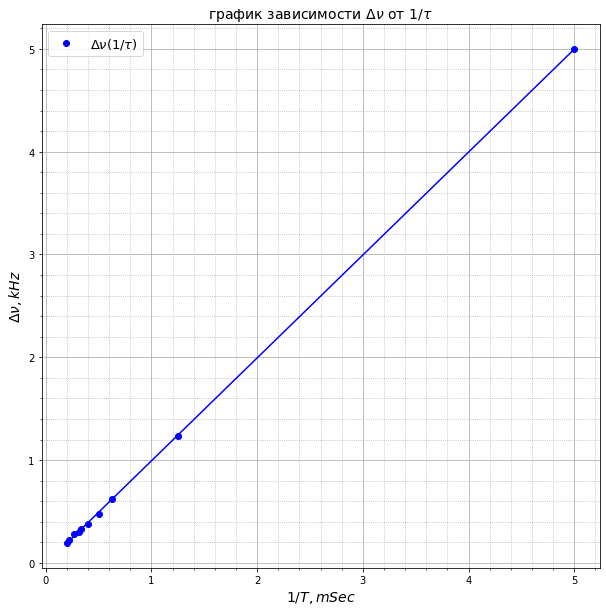

In [19]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_xlabel("$1/T, mSec$", fontsize=14)
fig.set_ylabel("$\\Delta \\nu, kHz$", fontsize=14)
fig.minorticks_on()
fig.set_title("график зависимости $\Delta \\nu$ от $1/\\tau$", fontsize=14)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

G = MNK(data["1/T"],  data["nu"], None, None, fig, lab = '$\Delta \\nu(1/\\tau)$', color = 'b')

fig.legend(fontsize = 13)
print(f'k = {G[0]:.3f} +- {G[-1]:.3f}(eps = {G[-1]/G[0]*100:.3f}%)')

## Г24

In [21]:

last_data = pd.DataFrame()
last_data["m"] = np.array([10, 30, 50, 75, 100])
last_data["a_b"] = np.array([0.0032, 0.095, 0.159, 0.238, 0.318])
last_data["a_o"] = 0.651
last_data["b/o"] = last_data["a_b"] / last_data["a_o"]
last_data

,m,a_b,a_o,b/o
0,10,0.0032,0.651,0.004916
1,30,0.0950,0.651,0.145929
2,50,0.1590,0.651,0.244240
3,75,0.2380,0.651,0.365591
4,100,0.3180,0.651,0.488479


In [22]:
def plat (dat):
    for i in dat:
        print(i, end = ' & ')

In [27]:
plat(last_data['a_o']*1000)

651.0 & 651.0 & 651.0 & 651.0 & 651.0 & 

k = 0.526 +- 0.018(eps = 3.418%)


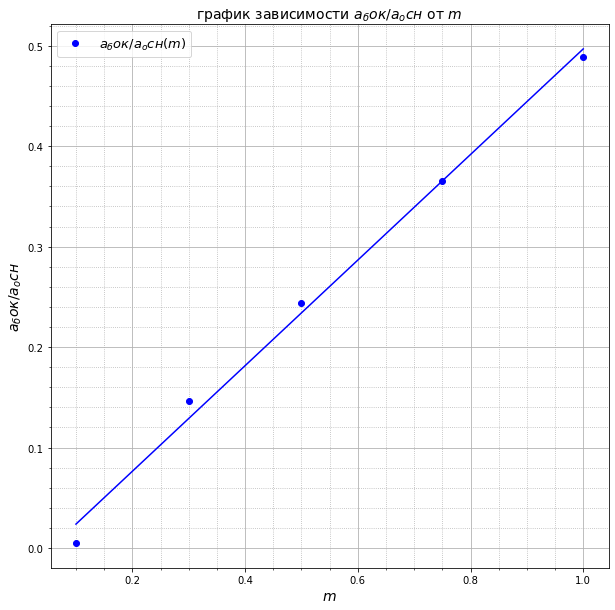

In [28]:
_, fig = plt.subplots(figsize = (10, 10))
fig.set_ylabel("$a_бок / a_осн$", fontsize=14)
fig.set_xlabel("$m$", fontsize=14)
fig.minorticks_on()
fig.set_title("график зависимости $a_бок / a_осн$ от $m$", fontsize=14)
plt.grid(which='major')
plt.grid(which='minor', linestyle=':')

G = MNK(last_data["m"],  last_data["b/o"], None, None, fig, lab = '$a_бок / a_осн(m)$', color = 'b')

fig.legend(fontsize = 13)
print(f'k = {G[0]:.3f} +- {G[-1]:.3f}(eps = {G[-1]/G[0]*100:.3f}%)')

## Д27

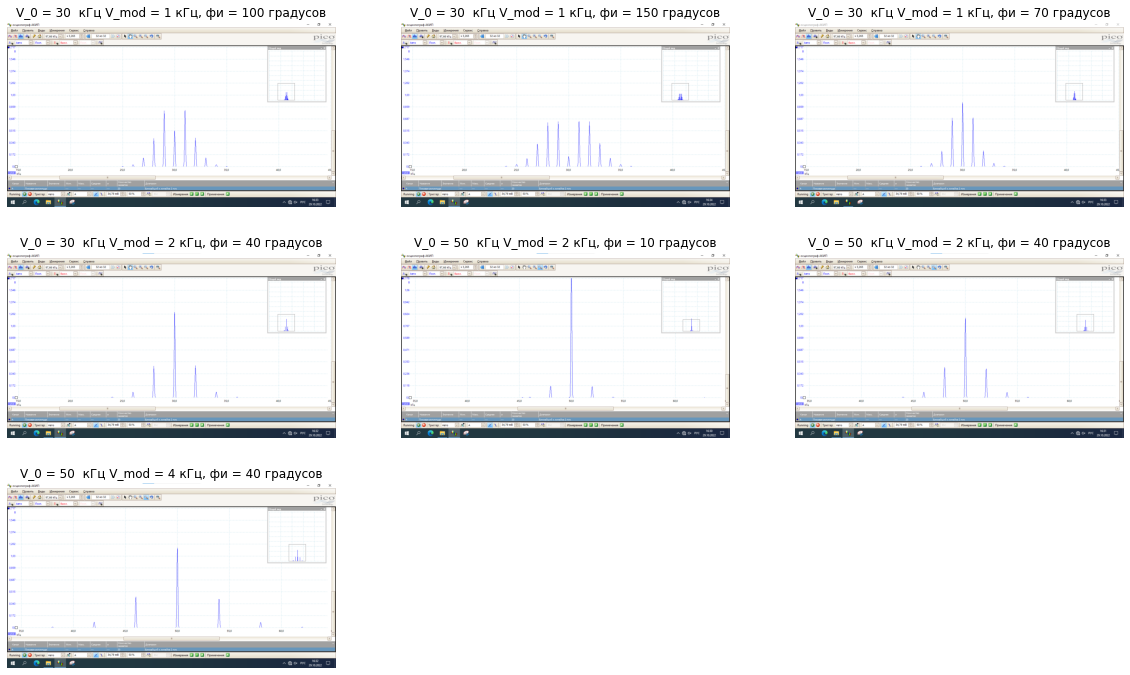

In [30]:
pictures = os.listdir('pic_D_27/')
pictures = list(filter(lambda x: os.path.isfile('pic_D_27/' + x), pictures))
pictures = sorted(pictures)

# Создадим фигуру размером 16 на 4 дюйма
pic_box = plt.figure(figsize=(20,12))

# Поочередно считываем в переменную picture имя изображения из списка pictures. В переменную i записываем номер итерации
for i, picture in enumerate(pictures):
    # считываем изображение в picture
    picture1 = Image.open('pic_D_27/' + picture)
    # добавляем ячейку в pix_box для вывода текущего изображения
    a = pic_box.add_subplot(3,3,i+1)
    a.set_title(picture.replace('.png', ''))
    plt.imshow(picture1)
    # отключаем отображение осей
    plt.axis('off')
plt.show() 